<a href="https://colab.research.google.com/github/Similien1/ANN_stunting/blob/main/Copy_of_Artificial_Neuron_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load data from drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')
import copy
from scipy import stats
from sklearn.impute import KNNImputer

#import visualization libraries
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import pyplot
%matplotlib inline
import seaborn as sns
sns.set()
!pip install researchpy
!pip install skfeature-chappers
import researchpy as rp
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

#import algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier

#import metrics
#from sklearn.metrics import confusion_matrix,plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score

#from sklearn.metrics import roc_auc_score,plot_roc_curve
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
data= pd.read_stata("/content/drive/MyDrive/chidrendataset.dta")
data.drop(['Radio'], axis =1,inplace=True)
data

,v024,v025,v714,b4,m4,h11,h43,stunting,birthweight,breaststart,...,age,m_anemia,mother_age,diarrhea,father_educ,reading,Marital_stat,Television1,Child_size,radio
0,kigali,urban,no,male,"ever breastfed, not currently breastfeeding",no,yes,Not stunted,>=2.5kg,Within 1st hour,...,24-35,Not anemic,Between 19-35 years,No,Primary,Never,Married,No,large,1.0
1,kigali,urban,no,female,still breastfeeding,"yes, last two weeks",yes,Not stunted,>=2.5kg,Within 1st hour,...,6-11,Not anemic,Between 19-35 years,Yes,Primary,Never,Married,No,large,0.0
2,kigali,urban,yes,female,still breastfeeding,no,yes,Not stunted,>=2.5kg,Within 1st hour,...,24-35,anemic,Between 19-35 years,No,Secondary/higher,Never,Married,Yes,average,0.0
3,kigali,urban,no,female,"ever breastfed, not currently breastfeeding",no,yes,Not stunted,>=2.5kg,Within 1st hour,...,36-47,Not anemic,Between 19-35 years,No,Primary,Never,Married,Yes,average,1.0
4,kigali,urban,yes,female,"ever breastfed, not currently breastfeeding",no,yes,Stunted,>=2.5kg,Within 1st hour,...,24-35,Not anemic,Between 19-35 years,No,NaN,Never,Separated,No,average,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,east,rural,yes,male,still breastfeeding,no,yes,Stunted,>=2.5kg,Within 1st hour,...,12-23,Not anemic,greater than 35 years,No,Secondary/higher,Never,Married,No,average,0.0
3810,east,rural,yes,male,still breastfeeding,"yes, last two weeks",no,Not stunted,NaN,Within 1st hour,...,<6,Not anemic,greater than 35 years,Yes,Primary,Never,Married,No,average,0.0
3811,east,rural,yes,male,still breastfeeding,"yes, last two weeks",yes,Not stunted,>=2.5kg,Within 1st hour,...,24-35,Not anemic,greater than 35 years,Yes,No education,Never,Married,No,average,0.0
3812,east,rural,yes,male,still breastfeeding,no,no,Not stunted,>=2.5kg,Within 1st hour,...,6-11,Not anemic,Between 19-35 years,No,Primary,Never,Married,No,average,1.0


In [ ]:
data.shape

(3814, 29)

In [ ]:
data.stunting.value_counts()

Not stunted    2542
Stunted        1272
Name: stunting, dtype: int64

In [ ]:
#Description of variables
data.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3814 entries, 0 to 3813
Data columns (total 29 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   v024              3814 non-null   category
 1   v025              3814 non-null   category
 2   v714              3814 non-null   category
 3   b4                3814 non-null   category
 4   m4                3814 non-null   category
 5   h11               3814 non-null   category
 6   h43               3814 non-null   category
 7   stunting          3814 non-null   category
 8   birthweight       3618 non-null   category
 9   breaststart       3783 non-null   category
 10  improved_toilet   3764 non-null   category
 11  improved_water    3760 non-null   category
 12  place_delivery    3814 non-null   category
 13  number_antenatal  3814 non-null   category
 14  mother_educ       3814 non-null   category
 15  births_last5yrs   3814 non-null   category
 16  Mothers_BMI       3814 n

In [ ]:
# summarize the number of rows with missing values for each column
total_missing_data = data.isnull().sum().sort_values(ascending=False)
percent_of_missing_data = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
missing_data = pd.concat(
    [
        total_missing_data,
        percent_of_missing_data#
    ],
    axis=1,
    keys=['Total', 'Percent']
)
print(missing_data.head(30))

                  Total    Percent
father_educ         631  16.544310
birthweight         196   5.138962
Child_size          109   2.857892
improved_water       54   1.415836
radio                50   1.310960
Television1          50   1.310960
improved_toilet      50   1.310960
breaststart          31   0.812795
m_anemia              2   0.052438
mother_height         0   0.000000
Marital_stat          0   0.000000
reading               0   0.000000
diarrhea              0   0.000000
mother_age            0   0.000000
age                   0   0.000000
Altitudes             0   0.000000
v024                  0   0.000000
Mothers_BMI           0   0.000000
births_last5yrs       0   0.000000
v025                  0   0.000000
number_antenatal      0   0.000000
place_delivery        0   0.000000
stunting              0   0.000000
h43                   0   0.000000
h11                   0   0.000000
m4                    0   0.000000
b4                    0   0.000000
v714                

In [ ]:
##Encoding categorical variables by using map function
data['antenatal']=data.number_antenatal.map({'No antenatal care': 0 , '1-4 antenatal care ': 1, 'more than 5 antenatal care':2 })
data['Mothers_BMI']=data.Mothers_BMI.map({'Underweight': 0 , 'Healthy': 1,'Overweight':2,'Obese':3})
data['stunting']=data.stunting.map({'Not stunted': 0,'Stunted': 1,})
data['birthweight']=data.birthweight.map({'>=2.5kg': 0,'<2.5kg': 1})
data['breaststart']=data.breaststart.map({'Within 1st hour': 0,'1-24 hours': 1, '1-30days':2})
data['toilet']=data.improved_toilet.map({'Not improved': 0,'Improved': 1})
data['water']=data.improved_water.map({'Not improved': 0,'Improved': 1})
data['place_delivery']=data.place_delivery.map({'other': 0,'delivery at Home': 1,'delivery at health facility ':2})
data['mother_educ']=data.mother_educ.map({'No education': 0,'Primary': 1,'Secondary/higher':2})
data['births_last5yrs']=data.births_last5yrs.map({'1': 0,'2': 1,'3+':2})
data['Sex']=data.b4.map({'male': 0,'female': 1})
data['Province']=data.v024.map({'kigali': 0,'south': 1,'east':2, 'west':3,'north':4})
data['Residence']=data.v025.map({'rural': 0,'urban': 1})
#data['wealth__index']=data.wealth__index.map({'poor': 1,'middle': 2,'richer': 3})
data['Television']=data.Television1.map({'No':0,'Yes': 1})
data['reading']=data.reading.map({'Never': 0,'Reading': 1})
data['intestinal parasite']=data.h43.map({'no':0,'yes':1})
data['currently breastfeeding']=data.m4.map({'never breastfed':0,'ever breastfed, not currently breastfeeding':1,'still breastfeeding':2})
data['mother_height']=data.mother_height.map({'<160cm':0,'>=160cm':1})
data['Altitudes']=data.Altitudes.map({'=<2000 m':0,'>2000m':1})
data['baby_age']=data.age.map({'<6': 0 , '6-11': 1,'12-23':2 ,'24-35':3, '36-47':4 ,'48-59':5})
data['m_anemia']=data.m_anemia .map({'Not anemic': 0,'anemic': 1})
#data['father_educ']=data.father_educ.map({'No education': 0,'Primary ': 1,'Secondary/higher':2})
data['Child_size']=data.Child_size.map({'small': 0,'average': 1,'large':2})
data['diarrhea']=data.diarrhea.map({'No': 0,'Yes': 1})
data['Marital_stat']=data.Marital_stat.map({'Single': 0,'Married': 1,'Separated':2})
data['mother_age']=data.mother_age.map({'less than 18 years': 0,'Between 19-35 years': 1,'greater than 35 years':2})
data['mother_occ']=data.v714.map({'no': 0,'yes': 1})

#data.head()

In [ ]:
#dropping the repeated variables
data.drop(['v024','v025','v714','b4','m4','h11','h43','improved_toilet','improved_water','number_antenatal','age','father_educ'],axis=1, inplace=True)

In [ ]:
data.info ()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3814 entries, 0 to 3813
Data columns (total 28 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   stunting                 3814 non-null   category
 1   birthweight              3618 non-null   category
 2   breaststart              3783 non-null   category
 3   place_delivery           3814 non-null   category
 4   mother_educ              3814 non-null   category
 5   births_last5yrs          3814 non-null   category
 6   Mothers_BMI              3814 non-null   category
 7   mother_height            3814 non-null   category
 8   Altitudes                3814 non-null   category
 9   m_anemia                 3812 non-null   category
 10  mother_age               3814 non-null   category
 11  diarrhea                 3814 non-null   category
 12  reading                  3814 non-null   category
 13  Marital_stat             3814 non-null   category
 14  Televisi

**Handling missing values(NaN) with KNN Imputer**

In [ ]:
# define imputer
imputer = KNNImputer(missing_values=np.nan,n_neighbors=1,weights='distance', metric='nan_euclidean')
# fit and transform the variable (['birthweight','Sex','m_anemia'])
a=imputer.fit_transform(data[['birthweight','m_anemia', 'Residence']])
df1=pd.DataFrame(a,columns =['birthweight','m_anemia','Residence'])
df1['birthweight'].value_counts()

0.0    3590
1.0     224
Name: birthweight, dtype: int64

In [ ]:
# define imputer
imputer = KNNImputer(missing_values=np.nan,n_neighbors=1,weights='distance', metric='nan_euclidean')
#fit and transform the variable ('reading','Television1','Radio','water','toilet')
d=imputer.fit_transform(data[['reading','Television','radio','water','toilet']])
df2=pd.DataFrame(d,columns =['reading','Television','radio','water','toilet'])
df2['radio'].value_counts()

0.0    2263
1.0    1551
Name: radio, dtype: int64

In [ ]:
#define imputer
imputer = KNNImputer(missing_values=np.nan,n_neighbors=1,weights='distance', metric='nan_euclidean')
# fit and transform the variable ('hw70','hw71','hw72','diet4g')
g=imputer.fit_transform(data[['breaststart','antenatal']])
df3=pd.DataFrame(g,columns =['breaststart','antenatal'])
df3['breaststart'].value_counts()

0.0    3290
1.0     447
2.0      77
Name: breaststart, dtype: int64

In [ ]:
#define imputer
imputer = KNNImputer(missing_values=np.nan,n_neighbors=1,weights='distance', metric='nan_euclidean')
# fit and transform the variable ('hw70','hw71','hw72','diet4g')
e=imputer.fit_transform(data[['Child_size','mother_age']])
df4=pd.DataFrame(e,columns =['Child_size','mother_age'])
df4['Child_size'].value_counts()

1.0    2037
2.0    1211
0.0     566
Name: Child_size, dtype: int64

In [ ]:
df5=data[['stunting','place_delivery','mother_educ','Mothers_BMI','mother_height','Altitudes','diarrhea','Marital_stat','Province','Sex','births_last5yrs','intestinal parasite','baby_age']].astype('float64')
df5

,stunting,place_delivery,mother_educ,Mothers_BMI,mother_height,Altitudes,diarrhea,Marital_stat,Province,Sex,births_last5yrs,intestinal parasite,baby_age
0,0.0,2.0,2.0,2.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0
1,0.0,2.0,1.0,3.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2,0.0,2.0,2.0,3.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0
3,0.0,2.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,4.0
4,1.0,2.0,2.0,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,1.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,2.0
3810,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0
3811,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,3.0
3812,0.0,2.0,1.0,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0


In [ ]:
# use pd.concat to join the variables after handling missing values
frames = [df1, df2,df3,df4,df5]
dataf=pd.concat(frames,axis = 1)
dataf

,birthweight,m_anemia,Residence,reading,Television,radio,water,toilet,breaststart,antenatal,...,Mothers_BMI,mother_height,Altitudes,diarrhea,Marital_stat,Province,Sex,births_last5yrs,intestinal parasite,baby_age
0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,...,2.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,1.0,3.0
1,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,3.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0
2,0.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,3.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,3.0
3,0.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,2.0,...,3.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,4.0
4,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0,1.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3809,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,2.0,0.0,1.0,1.0,2.0
3810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,0.0,0.0
3811,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,3.0
3812,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,...,2.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,1.0


In [ ]:
#import pandas as pd

#drop_list = ['m_anemia', 'reading', 'Television','radio','diarrhea','place_delivery']
#dataf1 = dataf.drop(drop_list, axis=1)
#dataf1

In [ ]:
  #checking for missing values in rows
count=0
for i in dataf.isnull().sum(axis=1):
    if i>0:
        count=count+1
print('Total number of rows with missing values is ', count)

Total number of rows with missing values is  0


In [ ]:
#descrcption of dataf as new dataset after handling missing values
dataf.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3814 entries, 0 to 3813
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   birthweight          3814 non-null   float64
 1   m_anemia             3814 non-null   float64
 2   Residence            3814 non-null   float64
 3   reading              3814 non-null   float64
 4   Television           3814 non-null   float64
 5   radio                3814 non-null   float64
 6   water                3814 non-null   float64
 7   toilet               3814 non-null   float64
 8   breaststart          3814 non-null   float64
 9   antenatal            3814 non-null   float64
 10  Child_size           3814 non-null   float64
 11  mother_age           3814 non-null   float64
 12  stunting             3814 non-null   float64
 13  place_delivery       3814 non-null   float64
 14  mother_educ          3814 non-null   float64
 15  Mothers_BMI          3814 non-null   f

#****Data exploration****

### **Description for each  variables**

Percentage of children not stunted : 66.65%
Percentage of children stunted: 33.35%


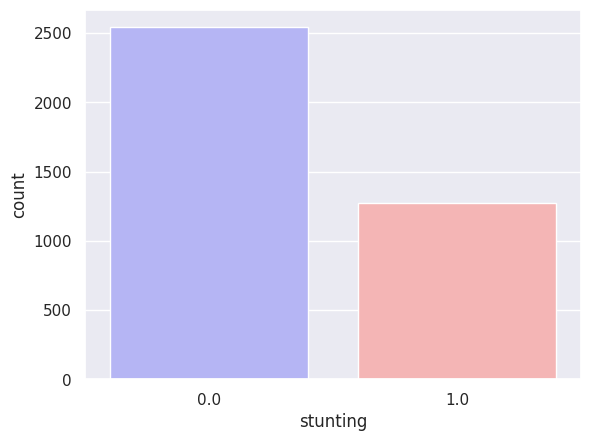

In [ ]:
##Count value of  dependent variable which is stunting status of children
dataf.stunting.value_counts().reset_index(name='count').rename(columns={'index':'stunting status'})
countNoDisease = len(dataf[dataf.stunting == 0])
countHaveDisease = len(dataf[dataf.stunting == 1])
print("Percentage of children not stunted : {:.2f}%".format((countNoDisease / (len(dataf.stunting))*100)))
print("Percentage of children stunted: {:.2f}%".format((countHaveDisease / (len(dataf.stunting))*100)))
# making a barchat showing the dependent variable
sns.countplot(x='stunting', data=dataf, palette="bwr")
plt.show()

Percentage of male children : 50.39%
Percentage of female: 49.61%


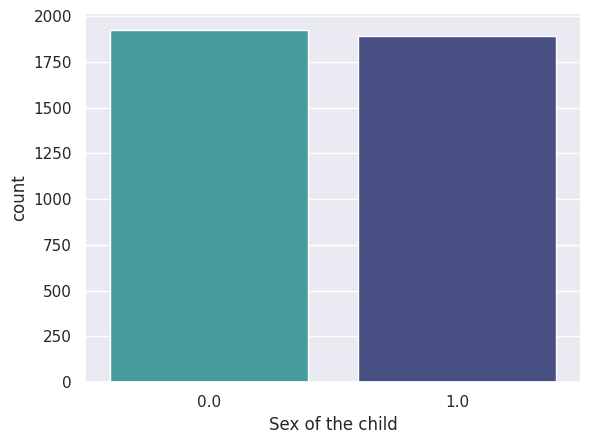

In [ ]:
# Summary statistics for sex
countmale= len(dataf[dataf.Sex ==0])
countfemale = len(dataf[dataf.Sex ==1])
print("Percentage of male children : {:.2f}%".format((countmale / (len(dataf.Sex))*100)))
print("Percentage of female: {:.2f}%".format((countfemale / (len(dataf.Sex))*100)))
#bar plot for sex child
sns.countplot(x='Sex', data=dataf, palette="mako_r")
plt.xlabel("Sex of the child")
plt.show()

In [ ]:
#Univariate analysis for Variables related to child’s characteristics
rp.summary_cat(dataf[['birthweight','Sex','breaststart','Child_size','baby_age']])

/usr/local/lib/python3.10/dist-packages/researchpy/summary.py:225: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


,Variable,Outcome,Count,Percent
0,birthweight,0.0,3590,94.13
1,,1.0,224,5.87
2,Sex,0.0,1922,50.39
3,,1.0,1892,49.61
4,breaststart,0.0,3290,86.26
5,,1.0,447,11.72
6,,2.0,77,2.02
7,Child_size,1.0,2037,53.41
8,,2.0,1211,31.75
9,,0.0,566,14.84


In [ ]:
#Univariate analysis for Variables relating to the child’s mother
rp.summary_cat(dataf[['mother_age','mother_educ','mother_height','Marital_stat']])

/usr/local/lib/python3.10/dist-packages/researchpy/summary.py:225: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


,Variable,Outcome,Count,Percent
0,mother_age,1.0,2628,68.90
1,,2.0,1161,30.44
2,,0.0,25,0.66
3,mother_educ,1.0,2489,65.26
4,,2.0,872,22.86
5,,0.0,453,11.88
6,mother_height,0.0,2729,71.55
7,,1.0,1085,28.45
8,Marital_stat,1.0,3183,83.46
9,,0.0,328,8.60


In [ ]:
#Univariate analysis of other variables related to HH
rp.summary_cat(dataf[['Altitudes','Province','Residence']])

/usr/local/lib/python3.10/dist-packages/researchpy/summary.py:225: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for ix, df_col in group1.iteritems():


,Variable,Outcome,Count,Percent
0,Altitudes,0.0,3143,82.41
1,,1.0,671,17.59
2,Province,3.0,975,25.56
3,,2.0,920,24.12
4,,1.0,878,23.02
5,,4.0,611,16.02
6,,0.0,430,11.27
7,Residence,0.0,3024,79.29
8,,1.0,790,20.71


## **Bivariate analysis**

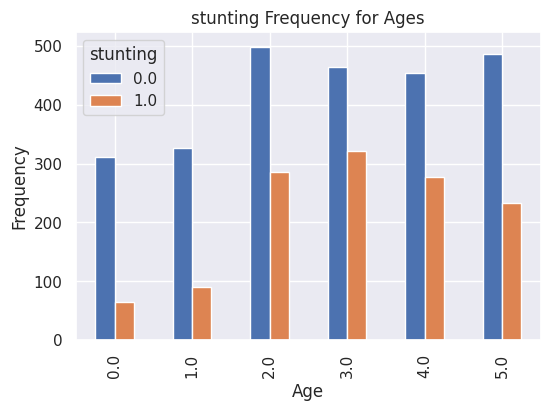

In [ ]:
# Test of association of Anemia stunting disease and age of children by barchart
pd.crosstab(dataf.baby_age,dataf.stunting).plot(kind="bar",figsize=(6,4))
plt.title('stunting Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('stunting And Ages.png')
plt.show()

In [ ]:
#test
crosstab, test_results, expected = rp.crosstab(dataf["Sex"], dataf["stunting"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

#sex=pd.crosstab(dataf['Sex'], dataf['stunting'])
#print(sex)
print(crosstab)
test_results

         stunting               
stunting      0.0    1.0     All
Sex                             
0.0         31.65  18.75   50.39
1.0         35.00  14.60   49.61
All         66.65  33.35  100.00


,Chi-square test,results
0,Pearson Chi-square ( 1.0) =,25.8367
1,p-value =,0.0000
2,Cramer's phi =,0.0823


In [ ]:
#test
crosstab, test_results, expected = rp.crosstab(dataf["baby_age"], dataf["stunting"],
                                               test= "chi-square",
                                               expected_freqs= True,
                                               prop= "cell")

#ag=pd.crosstab(dataf['baby_age'], dataf['stunting'])
#print(ag)
print(crosstab)
test_results

         stunting               
stunting      0.0    1.0     All
baby_age                        
0.0          8.15   1.70    9.86
1.0          8.57   2.36   10.93
2.0         13.08   7.47   20.56
3.0         12.17   8.44   20.61
4.0         11.90   7.26   19.17
5.0         12.77   6.11   18.88
All         66.65  33.35  100.00


,Chi-square test,results
0,Pearson Chi-square ( 5.0) =,100.4202
1,p-value =,0.0000
2,Cramer's V =,0.1623


In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
# split into input and output variables
#y = dataf['stunting']
#X = dataf.drop(['stunting'], axis = 1)

In [ ]:
#oversample = SMOTE()
#X_r, y_r = SMOTE().fit_resample(X, y)
#sm = SMOTE(random_state=0,k_neighbors=4)
#X_r, y_r = sm.fit_resample(X, y)

In [ ]:
#from collections import Counter
# summarize the new class distribution
#counter = Counter(y_r)
#print(counter)

In [ ]:
#detecting correlations between varibles
#import seaborn as sns
#uniform_data = np.random.rand(10, 12)
#corr = X.corr()
#f, ax = plt.subplots(figsize=(15, 18))
#cmap = sns.diverging_palette(230, 20, as_cmap=True)
#sns.heatmap(corr, annot=True, cmap=cmap)

In [ ]:
#Train/Test split
# Define the split - into 8 folds
#skf = StratifiedKFold(n_splits=10,random_state=None, shuffle=False)
#skf.get_n_splits(X_r, y_r)
#lst_accu_stratified = []
# returns the number of splitting iterations in the cross-validator
#print(skf)


#**Encoding varible into dummy variables**

In [ ]:
#for train_index, test_index in skf.split(X, y):
 #print('train:', train_index, 'test:', test_index)
 #X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size=0.1, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, shuffle=True, random_state=42)
 # summarize train and test composition
# train_0, train_1 = len(y_train[y_train==0]), len(y_train[y_train==1])
 #test_0, test_1= len(y_test[y_test==0]), len(y_test[y_test==1])
 #print('>Train: 0=%d, 1=%d, Test: 0=%d, 1=%d' % (train_0, train_1, test_0, test_1))

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
data = dataf

# Select the relevant columns for prediction 'Television', 'radio',
#columns = ['birthweight', 'm_anemia', 'Residence', 'reading',
 #          'breaststart', 'Child_size', 'mother_age', 'place_delivery', 'mother_educ',
#           'mother_height', 'Altitudes', 'diarrhea', 'Marital_stat', 'Province',
#           'Sex', 'baby_age', 'stunting']
columns = ['birthweight', 'Sex', 'm_anemia', 'reading', 'Television', 'radio','water', 'toilet', 'breaststart',
            'antenatal', 'Child_size','mother_age','place_delivery', 'mother_educ','births_last5yrs', 'Mothers_BMI',
            'mother_height', 'Altitudes','diarrhea', 'Marital_stat', 'Province', 'Residence','intestinal parasite', 'baby_age','stunting']
df = data[columns]


# Split the data into training and test sets
X = df.drop('stunting', axis=1)
y = df['stunting']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
#y = dataf['stunting']
#X = dataf.drop(['stunting'], axis = 1)

#print('The number of training samples: {}\nThe number of testing samples: {}'.format(X_train.shape[0], X_test.shape[0]))

In [ ]:
#pip install tensorflow

In [ ]:
#pip install --upgrade pip

# Hyperparameter tuning codes

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV
from tensorflow.keras.optimizers import Adam
import numpy as np


# Define the model function
def create_model(learning_rate=0.001, units=64, activation='relu'):
    model = Sequential()
    model.add(Dense(units=units, input_dim=X_train.shape[1], activation=activation))
    model.add(Dense(units=1, activation='sigmoid'))
    optimizer = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create a KerasClassifier object
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'learning_rate': [0.001, 0.01, 0.1],
    'units': [32, 64, 128],
    'activation': ['relu', 'sigmoid']
}

# Perform grid search using 3-fold cross-validation
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Print the best hyperparameters and accuracy

print("Best parameters: ", grid_result.best_params_)
print("Best accuracy: ", grid_result.best_score_)


<ipython-input-227-e1c00d8fe028>:21: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


Best parameters:  {'activation': 'sigmoid', 'learning_rate': 0.01, 'units': 128}
Best accuracy:  0.7023926575978597


#Tune Learning Rate and Momentum

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
import numpy as np
from sklearn.model_selection import GridSearchCV

# Load the dataset


# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
def create_model(learn_rate=0.01, momentum=0):
    model = Sequential()
    model.add(Dense(units=32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation='sigmoid'))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create a KerasClassifier object
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'learn_rate': [0.001, 0.01, 0.1],
    'momentum': [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
}

# Perform a grid search to find the best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', test_acc)


<ipython-input-228-09be1d2ab93e>:29: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 1ms/step
Test accuracy: 0.6815203145478375


#Tune Network Weight Initialization

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Load the dataset

# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
def create_model(init_mode='uniform'):
    model = Sequential()
    model.add(Dense(units=32, input_dim=X_train.shape[1], activation='relu', kernel_initializer=init_mode))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation='sigmoid'))
    optimizer = Adam()
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create a KerasClassifier object
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'init_mode': ['uniform', 'lecun_uniform', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
}

# Perform a grid search to find the best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', test_acc)


<ipython-input-229-36fd1838d17c>:28: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 1ms/step
Test accuracy: 0.6605504587155964


#Tune the Neuron Activation Function

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Load the dataset


# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
def create_model(activation='relu'):
    model = Sequential()
    model.add(Dense(units=32, input_dim=X_train.shape[1], activation=activation))
    model.add(Dropout(0.2))
    model.add(Dense(units=1, activation='sigmoid'))
    optimizer = Adam()
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create a KerasClassifier object
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'activation': ['relu', 'sigmoid', 'tanh', 'linear']
}

# Perform a grid search to find the best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', test_acc)


<ipython-input-230-29f6b2855dac>:29: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 1ms/step
Test accuracy: 0.6631716906946264


#Tune Dropout Regularization

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Load the dataset


# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
def create_model(dropout_rate=0.0):
    model = Sequential()
    model.add(Dense(units=32, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(units=1, activation='sigmoid'))
    optimizer = Adam()
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create a KerasClassifier object
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'dropout_rate': [0.0, 0.1, 0.2, 0.3, 0.4, 0.5]
}

# Perform a grid search to find the best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', test_acc)


<ipython-input-231-9a1ec0bce637>:29: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 1ms/step
Test accuracy: 0.6592398427260813


#Tune the Number of Neurons in the Hidden Layer

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV

# Load the dataset
# Load the datase

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Build the ANN model
model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the model
def create_model(num_neurons=64):
    model = Sequential()
    model.add(Dense(units=num_neurons, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(units=1, activation='sigmoid'))
    optimizer = Adam()
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

# Create a KerasClassifier object
model = KerasClassifier(build_fn=create_model, verbose=0)

# Define the hyperparameter grid
param_grid = {
    'num_neurons': [32, 64, 128, 256]
}

# Perform a grid search to find the best hyperparameters
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)
grid_result = grid.fit(X_train, y_train)

# Evaluate the best model on the test set
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)
test_acc = accuracy_score(y_test, y_pred)
print('Test accuracy:', test_acc)


Epoch 1/100
96/96 [==============================] - 1s 2ms/step - loss: 0.6492 - accuracy: 0.6254
Epoch 2/100
96/96 [==============================] - 0s 2ms/step - loss: 0.5714 - accuracy: 0.6994
Epoch 3/100
96/96 [==============================] - 0s 2ms/step - loss: 0.5558 - accuracy: 0.7086
Epoch 4/100
96/96 [==============================] - 0s 2ms/step - loss: 0.5472 - accuracy: 0.7126
Epoch 5/100
96/96 [==============================] - 0s 2ms/step - loss: 0.5410 - accuracy: 0.7214
Epoch 6/100
96/96 [==============================] - 0s 2ms/step - loss: 0.5356 - accuracy: 0.7270
Epoch 7/100
96/96 [==============================] - 0s 2ms/step - loss: 0.5307 - accuracy: 0.7316
Epoch 8/100
96/96 [==============================] - 0s 2ms/step - loss: 0.5259 - accuracy: 0.7309
Epoch 9/100
96/96 [==============================] - 0s 2ms/step - loss: 0.5209 - accuracy: 0.7371
Epoch 10/100
96/96 [==============================] - 0s 2ms/step - loss: 0.5158 - accuracy: 0.7434
Epoch 11/

<ipython-input-232-db29d5291f84>:42: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model = KerasClassifier(build_fn=create_model, verbose=0)


24/24 [==============================] - 0s 1ms/step
Test accuracy: 0.6644823066841415


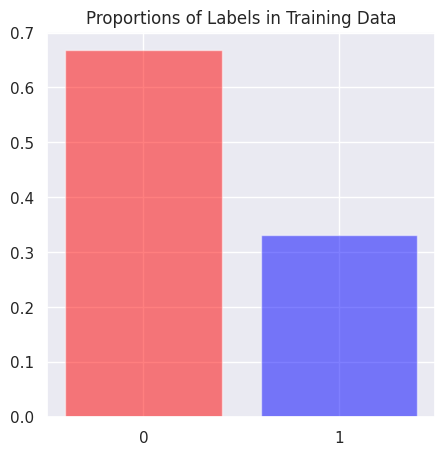

In [ ]:
# Make a bar chart showing the proportions of 0 labels and 1 labels in the training set
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
# Percentage of training data labeled 0
percent_0 = len(y_train[y_train == 0]) * 1. / len(y_train)
# Percentage of training data labeled 1
percent_1 = len(y_train[y_train == 1]) * 1. / len(y_train)
# Plot percentages in a bar plot
ax.bar((0, 1), (percent_0, percent_1), color=['red', 'blue'], alpha=0.5, align='center')
# Prettify the plot
ax.set_xticks([0, 1])
ax.set_title('Proportions of Labels in Training Data')
plt.show()

In [ ]:
X_test.shape

(763, 24)

In [ ]:
# use pd.concat to join the new columns with your original dataframe
#df= [X, b, e,f,g, h, j,o,q,w,z3]
#df= [X, a, b, e,g, h, i,k, n, q,s,v,w,z,z3]
#df= [X, a, b, d, e, f, g, h, i, l, m, n, o, p, q,s,t,v,w,z,z1,z2,z3,z4]
##df= [X, a, b, d, e, g, h, i, l, m, n, o, q,s,t,v,w,z,z1,z3]
#df= [X,a,b,d,e, f, g, h, i, j, k, m,l, n, o, p,q,s,t,z,z3]
#frame1=[X, a, f,e, g,i,h, j, l, m, n, o,q, p,r,t,w]
##X= pd.concat(df, axis=1)

In [ ]:
#Dropping existing columns
#X = X.drop(columns =['birthweight', 'Sex', 'm_anemia', 'reading', 'Television', 'radio','water', 'toilet', 'breaststart', 'antenatal', 'Child_size','mother_age','place_delivery', 'mother_educ','births_last5yrs', 'Mothers_BMI', 'mother_height', 'Altitudes','diarrhea', 'Marital_stat', 'Province', 'Residence','intestinal parasite', 'baby_age'])
##X = X.drop(columns =['birthweight', 'Sex', 'breaststart', 'antenatal', 'Child_size','mother_age', 'mother_educ', 'Mothers_BMI', 'mother_height', 'Altitudes','Marital_stat', 'Province', 'Residence','baby_age'])
#X = X.drop(columns =['birthweight', 'Sex', 'm_anemia', 'reading', 'Television', 'toilet', 'breaststart', 'antenatal', 'Child_size','place_delivery', 'mother_educ','births_last5yrs', 'Mothers_BMI', 'mother_height', 'Altitudes','diarrhea', 'Marital_stat', 'Province', 'Residence','intestinal parasite','baby_age','wealth__index'])
#X = X.drop(columns =['m4g','v714g','v190','hw1','m18','hw72','ml0g','v106g','h11g','h34','v013','b4g','v136','bord'])
#X = X.drop(columns =['hml32g','m4g','b4g','v106g','h11g','h22g','v113','v190','hw1','hw70','m18','v013','diet4g','h34','h43','v457','v025g','ironc','hw71','v116'])
##X.head()

In [ ]:
from keras.callbacks import Callback
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score


class Metrics(Callback):

    def on_train_begin(self, logs={}):
        self.val_f1s = []
        self.val_recalls = []
        self.val_precisions = []

    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(
            self.model.validation_data[0]))).round()
        val_targ = self.model.validation_data[1]
        _val_f1 = f1_score(val_targ, val_predict)
        _val_recall = recall_score(val_targ, val_predict)
        _val_precision = precision_score(val_targ, val_predict)
        self.val_f1s.append(_val_f1)
        self.val_recalls.append(_val_recall)
        self.val_precisions.append(_val_precision)
        print(f" — val_f1: {_val_f1} — val_precision: {_val_precision} — val_recall _val_recall")
        return


metrics = Metrics()

In [ ]:
X_train.shape[1:]

(24,)

In [ ]:
#!pip install tensorflow

In [ ]:
# Creating a model , train and test

# Final Algorithm: Best: 0.906970 using {'activation': 'softsign', 'batch_size': 40, 'epochs': 100, 'layers': [20]}

def ANNModel(X_train):


  # Getting the input shape

  input_shape = X_train.shape[1:]
  from keras.regularizers import l2
  from tensorflow.keras.utils import plot_model
  model= tf.keras.models.Sequential([

                # The first layer has 50 neurons(or units)
                tf.keras.layers.Dense(units=32, input_shape=input_shape, activation='softsign', kernel_initializer='normal', kernel_regularizer=l2(0.01)),
                #activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
                # The second layer has 40 neurons
                # tf.keras.layers.Dense(units=20, activation='softsign',kernel_initializer='normal', kernel_regularizer=l2(0.01)),softsign

                # # The third layer has 30 neurons
                # tf.keras.layers.Dense(units=30, activation='relu',kernel_initializer='normal', kernel_regularizer=l2(0.01)),

                # # The fouth layer has 20 neurons
                # tf.keras.layers.Dense(units=20, activation='relu',kernel_initializer='normal', kernel_regularizer=l2(0.01)),


                # # The fifth layer has 10 neurons
                # tf.keras.layers.Dense(units=10, activation='relu',kernel_initializer='normal', kernel_regularizer=l2(0.01)),

                # Because of sigmoid, the output of this layer will be a value bwteen 0 and 1 sigmoid
                tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  # Compiling the model Adamax binary_crossentropy', loss='sparse_categorical_crossentropy'CategoricalCrossentropy

  model.compile(optimizer='Adam',
                loss='binary_crossentropy',
                metrics='accuracy')
  plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)






  #Train The Model
  return model

model =   ANNModel(X_train)

In [ ]:
model.summary()

Model: "sequential_175"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_351 (Dense)           (None, 32)                800       
                                                                 
 dense_352 (Dense)           (None, 1)                 33        
                                                                 
Total params: 833
Trainable params: 833
Non-trainable params: 0
_________________________________________________________________


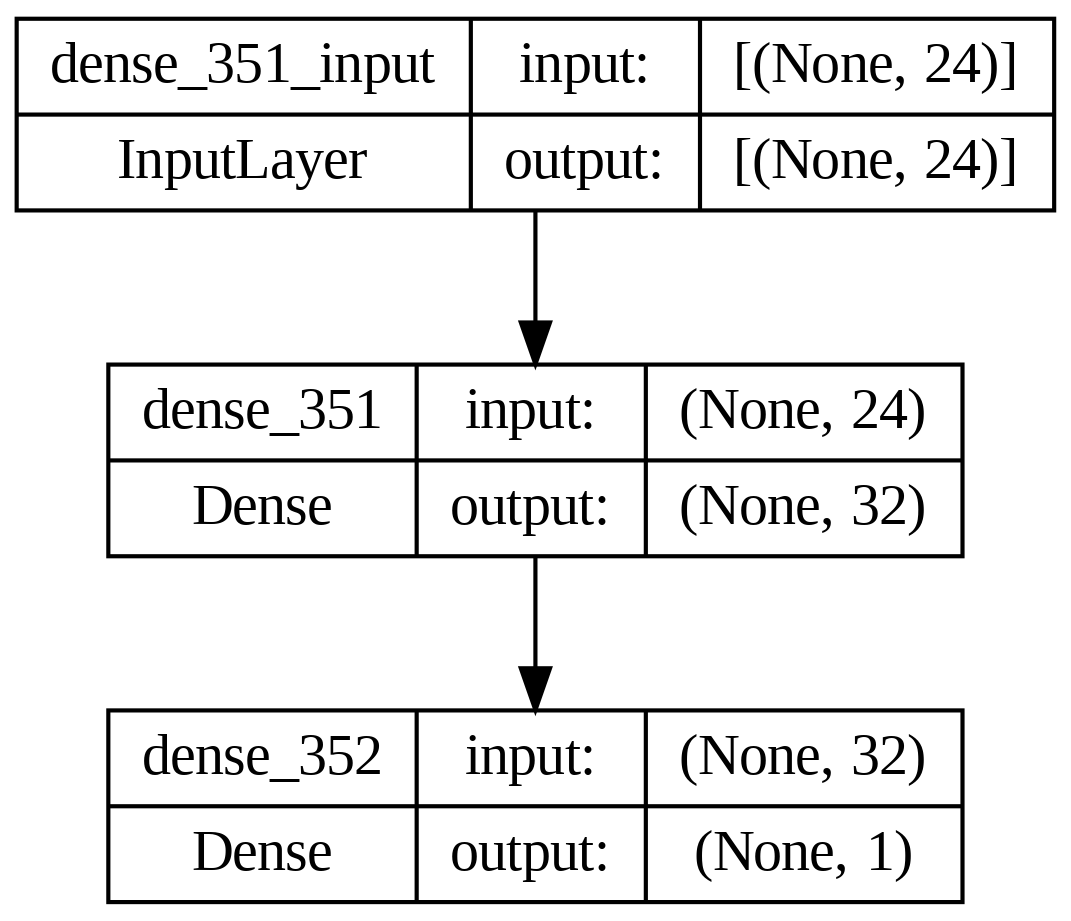

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True, dpi=300)



#from google.colab import files
#files.download( "model_plot.png" )

In [ ]:
ANNModel(X_train)

In [ ]:
#pip install my_module

In [ ]:
class VarImpVIANN(keras.callbacks.Callback):
    def __init__(self, verbose=0):
        self.verbose = verbose
        self.n = 0
        self.M2 = 0.0

    def on_train_begin(self, logs={}, verbose = 1):
        if self.verbose:
            print("VIANN version 1.0 (Wellford + Mean) update per epoch")
        self.diff = self.model.layers[0].get_weights()[0]

    def on_epoch_end(self, batch, logs={}):
        currentWeights = self.model.layers[0].get_weights()[0]

        self.n += 1
        delta = np.subtract(currentWeights, self.diff)
        self.diff += delta/self.n
        delta2 = np.subtract(currentWeights, self.diff)
        self.M2 += delta*delta2

        self.lastweights = self.model.layers[0].get_weights()[0]

    def on_train_end(self, batch, logs={}):
        if self.n < 2:
            self.s2 = float('nan')
        else:
            self.s2 = self.M2 / (self.n - 1)

        scores = np.sum(np.multiply(self.s2, np.abs(self.lastweights)), axis = 1)

        self.varScores = (scores - min(scores)) / (max(scores) - min(scores))
        if self.verbose:
            print("Most important variables: ",
                  np.array(self.varScores).argsort()[-10:][::-1])
            print("All important variables: ",
                  np.array(self.varScores).argsort()[:][::-1])

In [ ]:

#history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
def ANNModel_train(X_train, y_train):
  ANNModel(X_train)
  VIANN = VarImpVIANN(verbose=1)
  history = model.fit(X_train, y_train, batch_size=42, epochs=100, validation_split=0.20,  verbose=1, callbacks = [VIANN])
  print(VIANN.varScores)
  return history


In [ ]:
history = ANNModel_train(X_train, y_train)

VIANN version 1.0 (Wellford + Mean) update per epoch
Epoch 1/100
59/59 [==============================] - 1s 6ms/step - loss: 0.6404 - accuracy: 0.6471 - val_loss: 0.5977 - val_accuracy: 0.6923
Epoch 2/100
59/59 [==============================] - 0s 3ms/step - loss: 0.5866 - accuracy: 0.7029 - val_loss: 0.5720 - val_accuracy: 0.7136
Epoch 3/100
59/59 [==============================] - 0s 3ms/step - loss: 0.5716 - accuracy: 0.7053 - val_loss: 0.5647 - val_accuracy: 0.7136
Epoch 4/100
59/59 [==============================] - 0s 3ms/step - loss: 0.5679 - accuracy: 0.7123 - val_loss: 0.5634 - val_accuracy: 0.7152
Epoch 5/100
59/59 [==============================] - 0s 4ms/step - loss: 0.5656 - accuracy: 0.7066 - val_loss: 0.5622 - val_accuracy: 0.7169
Epoch 6/100
59/59 [==============================] - 0s 3ms/step - loss: 0.5652 - accuracy: 0.7070 - val_loss: 0.5597 - val_accuracy: 0.7136
Epoch 7/100
59/59 [==============================] - 0s 3ms/step - loss: 0.5642 - accuracy: 0.7119 - 

In [ ]:
def lossfunc(history):
  loss_acc_metrics_df = pd.DataFrame(history.history)
  loss_acc_metrics_df.plot(figsize=(10,5))
  plt.savefig("accuarcy_loss.png", format='PNG')
  plt.show()
  from google.colab import files
  files.download( "accuarcy_loss.png" )

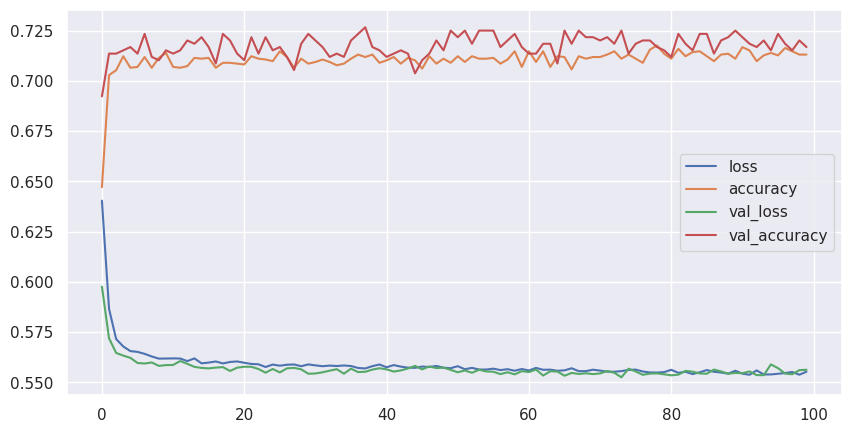

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
lossfunc(history)

In [ ]:
def ANNModel_testing(X_test, y_test):

  # Evaluating a model on unseen data: test set

  model_eval = model.evaluate(X_test, y_test)

  # Printing the loss and accuracy

  print('Test loss: {}\nTest accuracy:{}'.format(model_eval[0],model_eval[1]))

In [ ]:
ANNModel_testing(X_test, y_test)

24/24 [==============================] - 0s 2ms/step - loss: 0.5998 - accuracy: 0.6841
Test loss: 0.5997555255889893
Test accuracy:0.6841415762901306


In [ ]:
def performance(X_test,y_test):

  # Getting the confusion matrix

  from sklearn.metrics import confusion_matrix

  # Rounding the predictions to 0 and 1
  predictions = model.predict(X_test).ravel()
  predictions = tf.round(predictions) #Rounding to the nearest interger, either 0 or 1
  cm = confusion_matrix(y_test, predictions)

  # Plotting confusion matrix

  plt.figure(figsize=(6,6))
  sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=True,
                          xticklabels=['0: No stunting', '1:Stunting'],
                          yticklabels=['0: No stunting', '1:Stunting'])
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label');
  plt.savefig("Confusion_mat.png", format='PNG')
  plt.show()
  from google.colab import files
  #files.download( "Confusion_mat.png" )

  # Classification report
  from sklearn.metrics import classification_report
  print(classification_report(y_test, predictions))

  precision = precision_score(y_test, predictions)
  recall = recall_score(y_test, predictions)
  print('Precision: ',precision)
  print('Recall: ',recall)




24/24 [==============================] - 0s 2ms/step


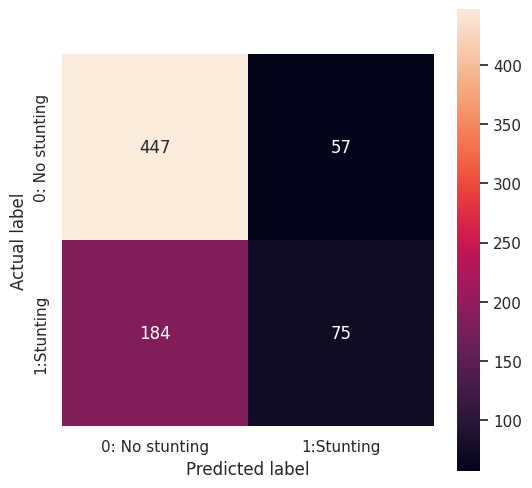

              precision    recall  f1-score   support

         0.0       0.71      0.89      0.79       504
         1.0       0.57      0.29      0.38       259

    accuracy                           0.68       763
   macro avg       0.64      0.59      0.59       763
weighted avg       0.66      0.68      0.65       763

Precision:  0.5681818181818182
Recall:  0.28957528957528955


In [ ]:
res = performance(X_test,y_test)

In [ ]:
pip install eli5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=107730 sha256=b093fe64de6a800e9fa3b61094a0720f1537f0561c45893f5ea789232342b7a8
  Stored in directory: /root/.cache/pip/wheels/b8/58/ef/2cf4c306898c2338d51540e0922c8e0d6028e07007085c0004
Successfully built eli5


In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import eli5
from eli5.sklearn import PermutationImportance
from keras.wrappers.scikit_learn import KerasClassifier

# Load the dataset
#data = dataf

# Select the relevant columns for prediction
#columns = ['birthweight', 'm_anemia', 'Residence', 'reading', 'Television', 'radio',
 #          'breaststart', 'Child_size', 'mother_age', 'place_delivery', 'mother_educ',
 #          'mother_height', 'Altitudes', 'diarrhea', 'Marital_stat', 'Province',
 #          'Sex', 'baby_age', 'stunting']
#df = data[columns]

# Preprocessing
# Encode categorical variables
#cat_columns = ['Residence', 'Marital_stat', 'Province', 'Sex']
#label_encoders = {}
#for col in cat_columns:
  #  label_encoders[col] = LabelEncoder()
 #   df[col] = label_encoders[col].fit_transform(df[col])

# Split the data into training and test sets
#X = df.drop('stunting', axis=1)
#y = df['stunting']
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
def create_model():
    model = Sequential()
    model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

# Wrap the Keras model using KerasClassifier
keras_classifier = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=1)

# Train the model
keras_classifier.fit(X_train, y_train)

# Calculate feature importances
perm = PermutationImportance(keras_classifier, random_state=42).fit(X_test, y_test)
feature_importances = eli5.show_weights(perm, feature_names=X.columns.tolist())
print(feature_importances)

Epoch 1/100


<ipython-input-256-483023f87d5d>:49: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_classifier = KerasClassifier(build_fn=create_model, epochs=100, batch_size=32, verbose=1)


96/96 [==============================] - 2s 2ms/step - loss: 0.6105 - accuracy: 0.6755
Epoch 2/100
96/96 [==============================] - 0s 2ms/step - loss: 0.5683 - accuracy: 0.7044
Epoch 3/100
96/96 [==============================] - 0s 2ms/step - loss: 0.5544 - accuracy: 0.7096
Epoch 4/100
96/96 [==============================] - 0s 2ms/step - loss: 0.5458 - accuracy: 0.7194
Epoch 5/100
96/96 [==============================] - 0s 2ms/step - loss: 0.5386 - accuracy: 0.7217
Epoch 6/100
96/96 [==============================] - 0s 2ms/step - loss: 0.5343 - accuracy: 0.7221
Epoch 7/100
96/96 [==============================] - 0s 2ms/step - loss: 0.5293 - accuracy: 0.7296
Epoch 8/100
96/96 [==============================] - 0s 2ms/step - loss: 0.5239 - accuracy: 0.7312
Epoch 9/100
96/96 [==============================] - 0s 2ms/step - loss: 0.5189 - accuracy: 0.7388
Epoch 10/100
96/96 [==============================] - 0s 2ms/step - loss: 0.5154 - accuracy: 0.7407
Epoch 11/100
96/96 [=

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



# Build the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Calculate feature importances (coefficients)
importance = model.coef_

# Display feature importances
feature_names = X.columns.tolist()
for feature, importance_score in zip(feature_names, importance):
    print(f"{feature}: {importance_score}")



birthweight: 0.04362944077149927
Sex: -0.046208597667334046
m_anemia: 0.015142777493285669
reading: -0.01859970076287442
Television: -0.03377522630505114
radio: -0.00668495795827881
water: 0.00425935253925337
toilet: -0.026648378570187203
breaststart: 0.014396308687172397
antenatal: 0.00983793535515861
Child_size: -0.054063086369439364
mother_age: 0.00024399874918920627
place_delivery: -0.010230063924953651
mother_educ: -0.022964586657294297
births_last5yrs: 0.0012601405791363303
Mothers_BMI: -0.017489963469253914
mother_height: -0.07339306195963223
Altitudes: 0.03985043322194018
diarrhea: 0.022156166795768453
Marital_stat: 0.017243870853614455
Province: 0.016819274444038766
Residence: -0.014652541017674133
intestinal parasite: 0.03457989940805439
baby_age: 0.02227189472241791


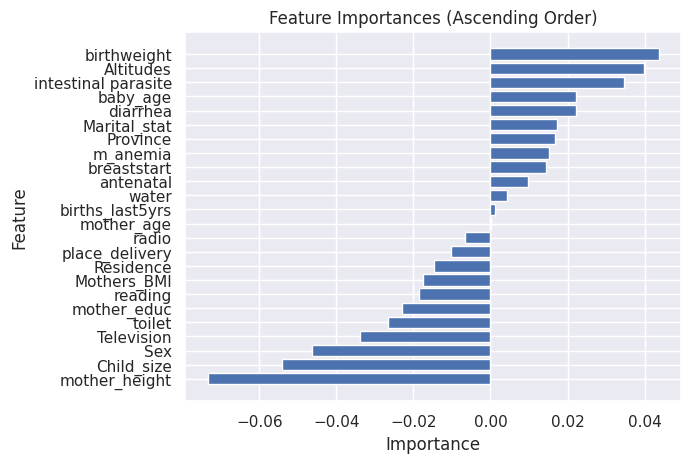

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Build the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Calculate feature importances (coefficients)
importance = model.coef_
feature_names = X.columns.tolist()

# Sort feature importances and corresponding feature names
importance_sorted, feature_names_sorted = zip(*sorted(zip(importance, feature_names)))

# Plot feature importances
plt.barh(range(len(importance_sorted)), importance_sorted, align='center')
plt.yticks(range(len(feature_names_sorted)), feature_names_sorted)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Ascending Order)')
plt.show()


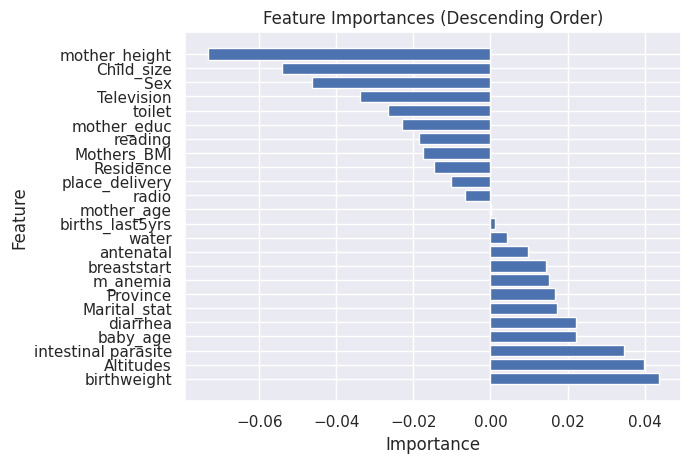

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt


# Build the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Calculate feature importances (coefficients)
importance = model.coef_
feature_names = X.columns.tolist()

# Sort feature importances and corresponding feature names in descending order
importance_sorted, feature_names_sorted = zip(*sorted(zip(importance, feature_names), reverse=True))

# Plot feature importances
plt.barh(range(len(importance_sorted)), importance_sorted, align='center')
plt.yticks(range(len(feature_names_sorted)), feature_names_sorted)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances (Descending Order)')
plt.show()


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from sklearn.linear_model import LinearRegression

# Prepare your dataset

# Build your ANN model
model = Sequential()
model.add(Dense(32, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='linear'))

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Get the weights of the trained model
weights = model.get_weights()

# Extract the feature importances (absolute magnitude of weights)
feature_importances = np.abs(weights[0])

# Normalize the feature importances
feature_importances /= np.sum(feature_importances)

# Print the feature importances
for feature_name, importance in zip(feature_names, feature_importances):
    print(f"{feature_name}: {importance}")



Epoch 1/100
96/96 [==============================] - 1s 3ms/step - loss: 0.2798
Epoch 2/100
96/96 [==============================] - 0s 3ms/step - loss: 0.2149
Epoch 3/100
96/96 [==============================] - 0s 3ms/step - loss: 0.2002
Epoch 4/100
96/96 [==============================] - 0s 3ms/step - loss: 0.1923
Epoch 5/100
96/96 [==============================] - 0s 3ms/step - loss: 0.1879
Epoch 6/100
96/96 [==============================] - 0s 3ms/step - loss: 0.1839
Epoch 7/100
96/96 [==============================] - 0s 3ms/step - loss: 0.1799
Epoch 8/100
96/96 [==============================] - 0s 3ms/step - loss: 0.1768
Epoch 9/100
96/96 [==============================] - 0s 3ms/step - loss: 0.1746
Epoch 10/100
96/96 [==============================] - 0s 3ms/step - loss: 0.1718
Epoch 11/100
96/96 [==============================] - 0s 3ms/step - loss: 0.1702
Epoch 12/100
96/96 [==============================] - 0s 3ms/step - loss: 0.1678
Epoch 13/100
96/96 [=================